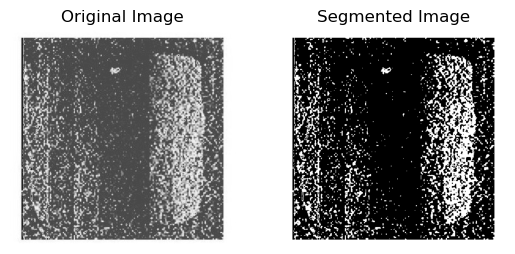

In [3]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('6522d349-3b34-4469-9193-3ababc8421b1.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Reshape the image to a 2D array of pixels
pixel_values = gray_image.reshape((-1, 1))

# Convert to float
pixel_values = np.float32(pixel_values)

# Define criteria and apply kmeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2  # number of clusters
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8 bit values
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create segmented image
segmented_image = centers[labels.flatten()]

# Reshape back to the original image dimension
segmented_image = segmented_image.reshape(gray_image.shape)

# Show the images
plt.subplot(121), plt.imshow(gray_image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image'), plt.axis('off')
plt.show()